In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv("/home/yeajin/Data_practice/loan_data.csv")

df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [125]:
df.info()
df.describe()  
#결측치 x 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [126]:
#범주형 변수 전처리 

In [3]:
categorical = [col for col in df.columns if df[col].dtype == 'O']
numerical = [col for col in df.columns if df[col].dtype != 'O']

df[categorical].head()

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No


In [128]:
df['person_gender'].value_counts()  #-> 라벨인코딩

male      24841
female    20159
Name: person_gender, dtype: int64

In [129]:
df['person_education'].value_counts()

Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: person_education, dtype: int64

In [4]:
df['person_education'] = df['person_education'].replace({"High School" : 0, "Associate":1, "Bachelor":2, "Master":3, "Doctorate":4})

df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,3,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,0,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,0,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,2,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,3,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,1,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,1,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,1,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,2,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [5]:
df['person_home_ownership'].value_counts()

RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: person_home_ownership, dtype: int64

In [6]:
df['person_home_ownership'] = df['person_home_ownership'].replace({"OTHER" : 0, "RENT":1, "MORTGAGE":2, "OWN":3})

df['person_home_ownership'].value_counts()

1    23443
2    18489
3     2951
0      117
Name: person_home_ownership, dtype: int64

In [133]:
df['loan_intent'].value_counts()  #->원핫 인코딩 

EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: loan_intent, dtype: int64

In [134]:
df['previous_loan_defaults_on_file'].value_counts() #-> 라벨 인코딩 

Yes    22858
No     22142
Name: previous_loan_defaults_on_file, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

cols = ['person_gender', 'loan_intent', 'previous_loan_defaults_on_file']

label = LabelEncoder()

for col in cols:
    label.fit(list(df[col].values))
    df[col] = label.transform(list(df[col].values))
    
    if col == 'loan_intent':
        onehot = OneHotEncoder()
        intent = onehot.fit_transform(df[col].values.reshape(-1,1)).toarray()
        onehot_col = ['intent' + str(i) for i in range(intent.shape[-1]) ]
        onehot_df = pd.DataFrame(intent, columns=onehot_col)
        df = pd.concat((df, onehot_df), axis=1).reset_index(drop=True)
        
df


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,intent0,intent1,intent2,intent3,intent4,intent5
0,22.0,0,3,71948.0,0,1,35000.0,4,16.02,0.49,3.0,561,0,1,0.0,0.0,0.0,0.0,1.0,0.0
1,21.0,0,0,12282.0,0,3,1000.0,1,11.14,0.08,2.0,504,1,0,0.0,1.0,0.0,0.0,0.0,0.0
2,25.0,0,0,12438.0,3,2,5500.0,3,12.87,0.44,3.0,635,0,1,0.0,0.0,0.0,1.0,0.0,0.0
3,23.0,0,2,79753.0,0,1,35000.0,3,15.23,0.44,2.0,675,0,1,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,1,3,66135.0,1,1,35000.0,3,14.27,0.53,4.0,586,0,1,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,1,47971.0,6,1,15000.0,3,15.66,0.31,3.0,645,0,1,0.0,0.0,0.0,1.0,0.0,0.0
44996,37.0,0,1,65800.0,17,1,9000.0,2,14.07,0.14,11.0,621,0,1,0.0,0.0,1.0,0.0,0.0,0.0
44997,33.0,1,1,56942.0,7,1,2771.0,0,10.02,0.05,10.0,668,0,1,1.0,0.0,0.0,0.0,0.0,0.0
44998,29.0,1,2,33164.0,4,1,12000.0,1,13.23,0.36,6.0,604,0,1,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
df = df.drop(['loan_intent'], axis=1)

In [12]:
df_corr = df.corr()
df_corr['loan_status'].sort_values()

previous_loan_defaults_on_file   -0.543096
person_home_ownership            -0.245168
person_income                    -0.135808
intent5                          -0.085992
intent1                          -0.064006
intent4                          -0.022488
person_age                       -0.021476
person_emp_exp                   -0.020481
cb_person_cred_hist_length       -0.014851
credit_score                     -0.007647
person_education                 -0.001108
person_gender                    -0.000561
intent2                           0.033838
intent3                           0.065195
intent0                           0.084130
loan_amnt                         0.107714
loan_int_rate                     0.332005
loan_percent_income               0.384880
loan_status                       1.000000
Name: loan_status, dtype: float64

<AxesSubplot: >

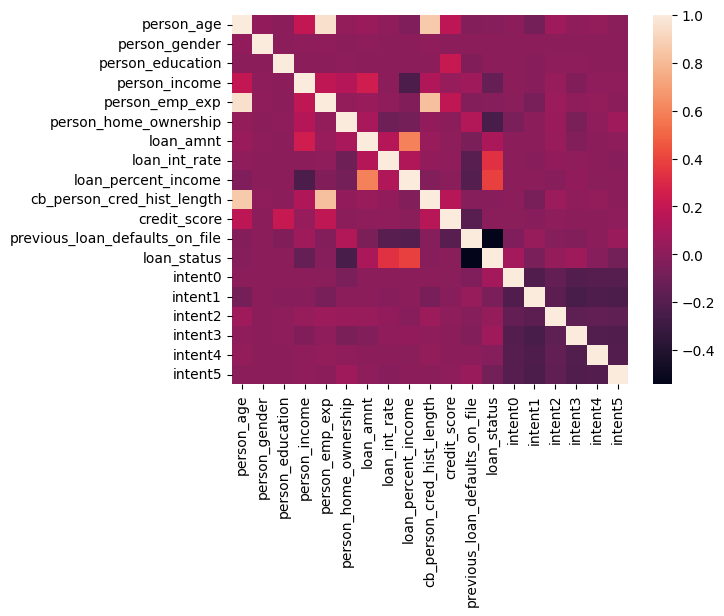

In [138]:
sns.heatmap(df_corr)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  int64  
 6   loan_amnt                       45000 non-null  float64
 7   loan_int_rate                   45000 non-null  float64
 8   loan_percent_income             45000 non-null  float64
 9   cb_person_cred_hist_length      45000 non-null  float64
 10  credit_score                    45000 non-null  int64  
 11  previous_loan_defaults_on_file  45000 non-null  int64  
 12  loan_status                     

In [9]:
X = df.drop(['loan_status'], axis=1)
y = df.loan_status

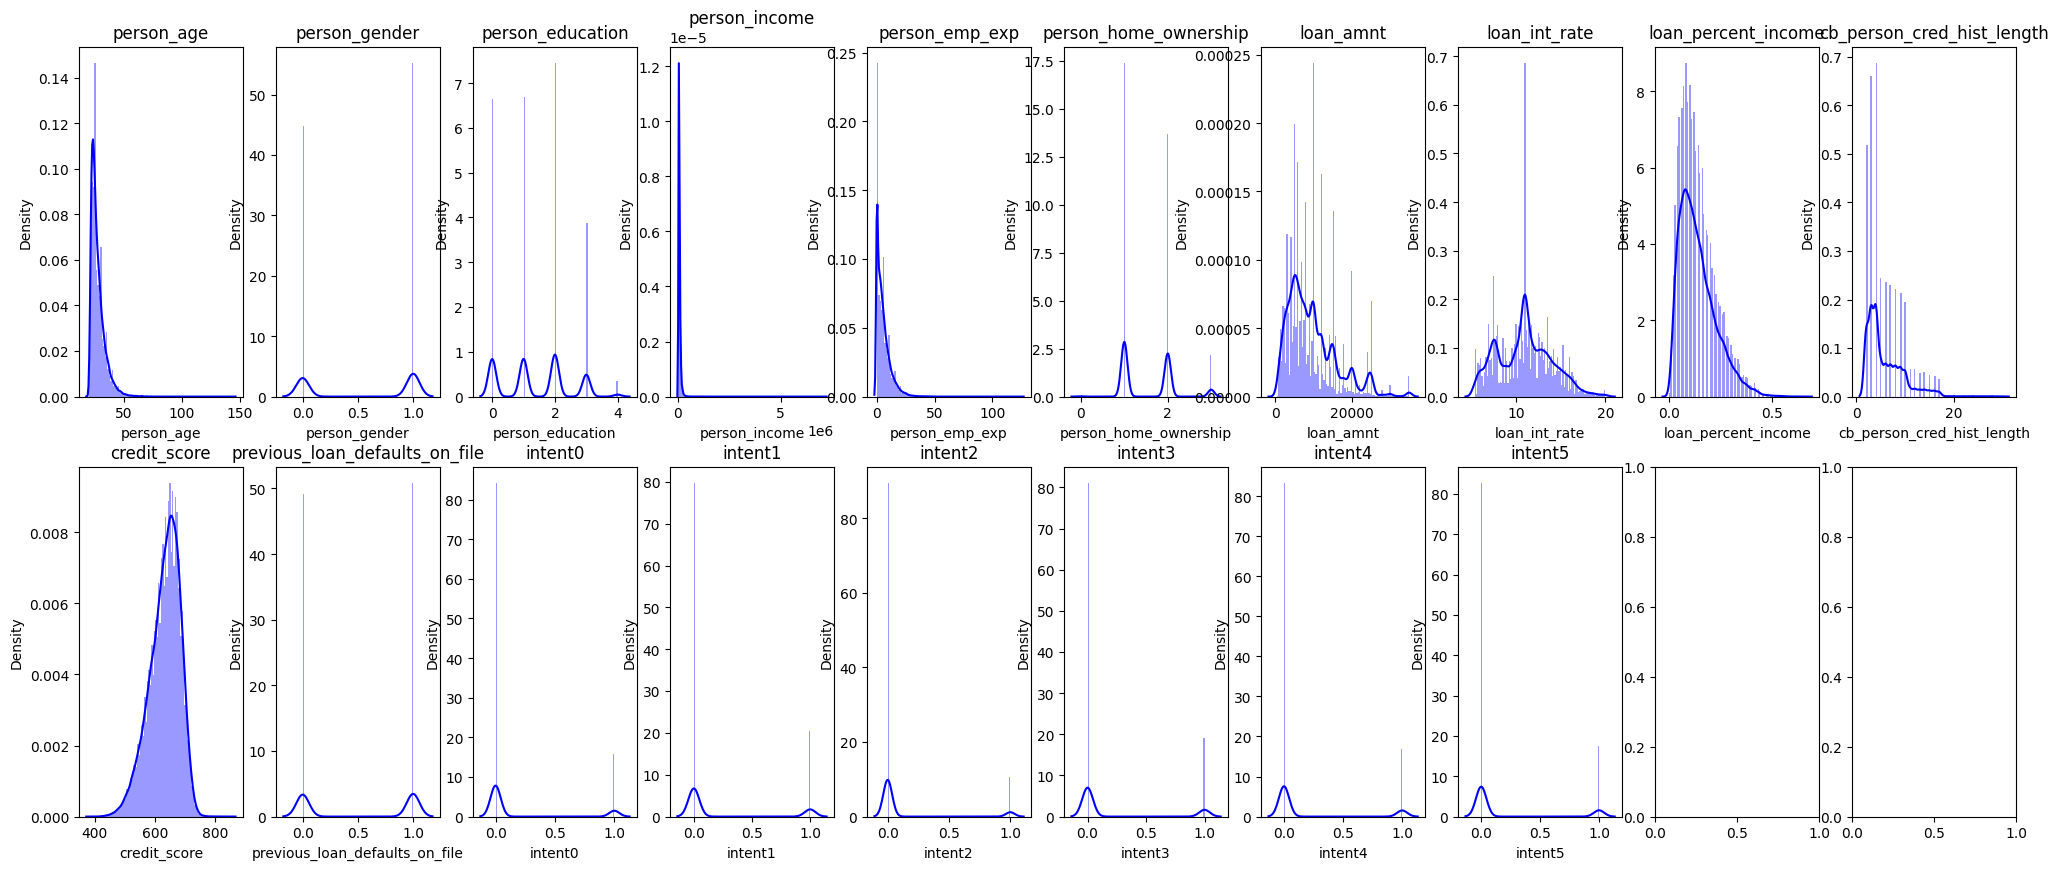

In [141]:
col = X.columns

fig, ax = plt.subplots(2, 10, figsize=(25,10))

i=1
for c in col:
    plt.subplot(2, 10, i)
    sns.distplot(X[c], color='blue', bins=100)
    plt.title(c)
    i+=1

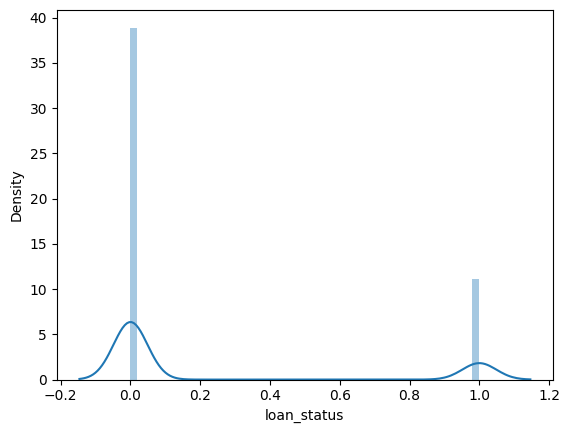

<Figure size 640x480 with 0 Axes>

In [142]:
#y값 시각화
sns.distplot(y)
plt.figure()
plt.show()

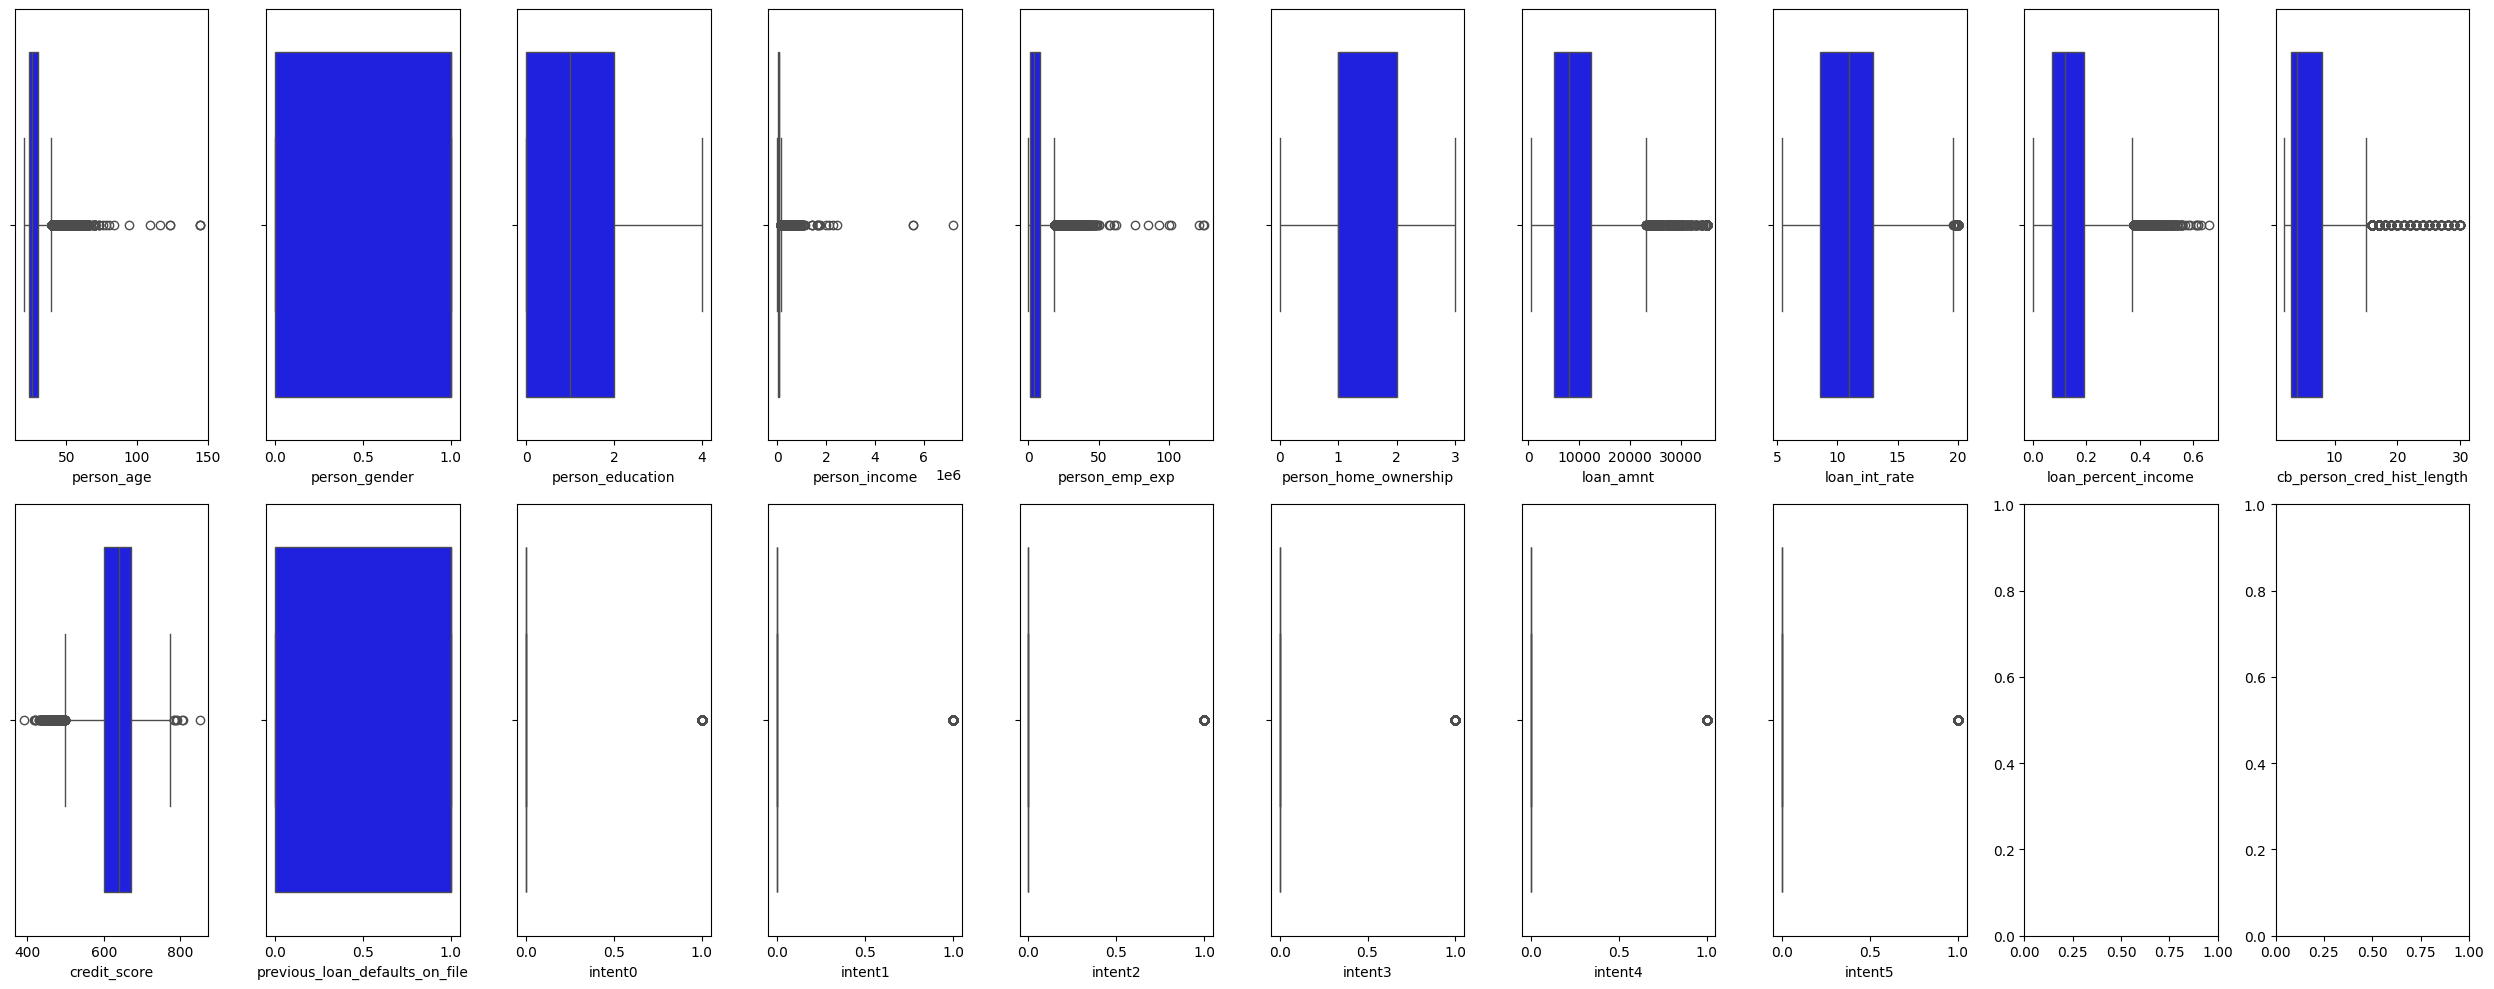

In [143]:
fig, axes = plt.subplots(2, 10, figsize=(25,10))
for i, (c, ax) in enumerate(zip(col, axes.flatten())):
    plt.subplot(2, 10, i+1)
    sns.boxplot(x=X[c], ax=ax, color='blue')
plt.tight_layout()
plt.show()

In [10]:
def change_outliers(data, cols):
    for col in cols:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3-Q1
        
        outlier_step = 2 *IQR
        
        Min = Q1-outlier_step
        Max = Q3+outlier_step
        
        data.loc[(data[col] > Max), col] = Max
        data.loc[(data[col] < Min), col] = Min

    return data

X = change_outliers(X, ['person_income', 'person_emp_exp'])
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,intent0,intent1,intent2,intent3,intent4,intent5
0,22.0,0,3,71948.0,0,1,35000.0,16.02,0.49,3.0,561,0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.0,0,0,12282.0,0,3,1000.0,11.14,0.08,2.0,504,1,0.0,1.0,0.0,0.0,0.0,0.0
2,25.0,0,0,12438.0,3,2,5500.0,12.87,0.44,3.0,635,0,0.0,0.0,0.0,1.0,0.0,0.0
3,23.0,0,2,79753.0,0,1,35000.0,15.23,0.44,2.0,675,0,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,1,3,66135.0,1,1,35000.0,14.27,0.53,4.0,586,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,1,47971.0,6,1,15000.0,15.66,0.31,3.0,645,0,0.0,0.0,0.0,1.0,0.0,0.0
44996,37.0,0,1,65800.0,17,1,9000.0,14.07,0.14,11.0,621,0,0.0,0.0,1.0,0.0,0.0,0.0
44997,33.0,1,1,56942.0,7,1,2771.0,10.02,0.05,10.0,668,0,1.0,0.0,0.0,0.0,0.0,0.0
44998,29.0,1,2,33164.0,4,1,12000.0,13.23,0.36,6.0,604,0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
X['person_income'] = np.log(X['person_income'])
X['loan_amnt'] = np.log(X['loan_amnt'])
X['credit_score'] = np.log(X['credit_score'])
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,intent0,intent1,intent2,intent3,intent4,intent5
0,22.0,0,3,11.183699,0,1,10.463103,16.02,0.49,3.0,6.329721,0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.0,0,0,9.415890,0,3,6.907755,11.14,0.08,2.0,6.222576,1,0.0,1.0,0.0,0.0,0.0,0.0
2,25.0,0,0,9.428512,3,2,8.612503,12.87,0.44,3.0,6.453625,0,0.0,0.0,0.0,1.0,0.0,0.0
3,23.0,0,2,11.286690,0,1,10.463103,15.23,0.44,2.0,6.514713,0,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,1,3,11.099453,1,1,10.463103,14.27,0.53,4.0,6.373320,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,1,10.778352,6,1,9.615805,15.66,0.31,3.0,6.469250,0,0.0,0.0,0.0,1.0,0.0,0.0
44996,37.0,0,1,11.094375,17,1,9.104980,14.07,0.14,11.0,6.431331,0,0.0,0.0,1.0,0.0,0.0,0.0
44997,33.0,1,1,10.949788,7,1,7.926964,10.02,0.05,10.0,6.504288,0,1.0,0.0,0.0,0.0,0.0,0.0
44998,29.0,1,2,10.409220,4,1,9.392662,13.23,0.36,6.0,6.403574,0,0.0,1.0,0.0,0.0,0.0,0.0


In [146]:
X.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'intent0', 'intent1', 'intent2',
       'intent3', 'intent4', 'intent5'],
      dtype='object')

In [12]:
cols = ['person_age', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_int_rate','cb_person_cred_hist_length', 'credit_score' ]

minmax = MinMaxScaler()
X[cols]  = minmax.fit_transform(X[cols])
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,intent0,intent1,intent2,intent3,intent4,intent5
0,0.016129,0,0.75,0.690064,0.000000,0.333333,1.000000,0.727023,0.49,0.035714,0.466665,0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.008065,0,0.00,0.134680,0.000000,1.000000,0.163151,0.392318,0.08,0.000000,0.329140,1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.040323,0,0.00,0.138646,0.136364,0.666667,0.564410,0.510974,0.44,0.035714,0.625702,0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.024194,0,0.50,0.722420,0.000000,0.333333,1.000000,0.672840,0.44,0.000000,0.704111,0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.032258,1,0.75,0.663597,0.045455,0.333333,1.000000,0.606996,0.53,0.071429,0.522627,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.056452,1,0.25,0.562718,0.272727,0.333333,0.800565,0.702332,0.31,0.035714,0.645758,0,0.0,0.0,0.0,1.0,0.0,0.0
44996,0.137097,0,0.25,0.662002,0.772727,0.333333,0.680328,0.593278,0.14,0.321429,0.597087,0,0.0,0.0,1.0,0.0,0.0,0.0
44997,0.104839,1,0.25,0.616578,0.318182,0.333333,0.403050,0.315501,0.05,0.285714,0.690731,0,1.0,0.0,0.0,0.0,0.0,0.0
44998,0.072581,1,0.50,0.446750,0.181818,0.333333,0.748042,0.535665,0.36,0.142857,0.561460,0,0.0,1.0,0.0,0.0,0.0,0.0


In [148]:
y.shape

(45000,)

# 모델링

In [13]:
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [151]:
sample_model = GradientBoostingClassifier()

sample_model.fit(X_train, y_train)
sample_pred = sample_model.predict_proba(X_test)

0.9226666666666666
0.9711497234855764


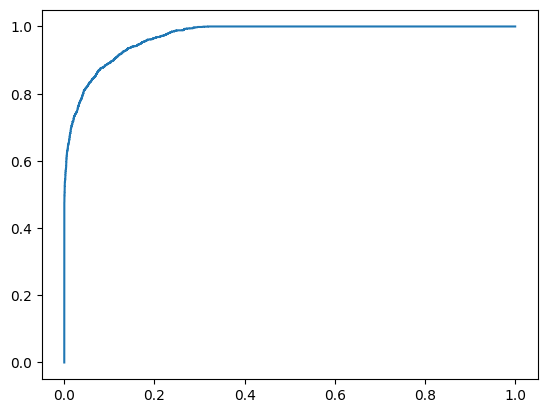

In [152]:
acc_score = accuracy_score(y_test, np.argmax(sample_pred, axis=1))
roc_score = roc_auc_score(y_test, sample_pred[:,1])

fpr, tpr, _ = roc_curve(y_test, sample_pred[:,1])

plt.plot(fpr, tpr)
print(acc_score)
print(roc_score)

In [153]:
important_features = sample_model.feature_importances_
important_df = pd.DataFrame(important_features.reshape(1, -1), columns=[col for col in X.columns])
important_df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,intent0,intent1,intent2,intent3,intent4,intent5
0,0.002048,0.0,0.0,0.088078,0.0,0.072771,0.000493,0.167763,0.188909,0.000227,0.011621,0.449146,0.005099,0.000634,0.00577,0.003315,0.00015,0.003976


In [14]:
candidate_col = ['previous_loan_defaults_on_file', 'loan_int_rate',	'loan_percent_income']

pca = PCA(n_components=3)
tmp = X.copy()
x_pca = pca.fit_transform(tmp)
pca_col = ['pca' + str(i) for i in range(x_pca.shape[-1])]
pca_df = pd.DataFrame(x_pca, columns = pca_col).reset_index(drop=True)

X = pd.concat((X, pca_df), axis = 1)
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,...,previous_loan_defaults_on_file,intent0,intent1,intent2,intent3,intent4,intent5,pca0,pca1,pca2
0,0.016129,0,0.75,0.690064,0.000000,0.333333,1.000000,0.727023,0.49,0.035714,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.570477,0.535944,-0.049451
1,0.008065,0,0.00,0.134680,0.000000,1.000000,0.163151,0.392318,0.08,0.000000,...,1,0.0,1.0,0.0,0.0,0.0,0.0,-0.620817,0.569493,0.784129
2,0.040323,0,0.00,0.138646,0.136364,0.666667,0.564410,0.510974,0.44,0.035714,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.657710,0.551992,-0.344029
3,0.024194,0,0.50,0.722420,0.000000,0.333333,1.000000,0.672840,0.44,0.000000,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.683908,0.549467,-0.335017
4,0.032258,1,0.75,0.663597,0.045455,0.333333,1.000000,0.606996,0.53,0.071429,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.655894,-0.449275,-0.356847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.056452,1,0.25,0.562718,0.272727,0.333333,0.800565,0.702332,0.31,0.035714,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.653214,-0.451218,-0.365889
44996,0.137097,0,0.25,0.662002,0.772727,0.333333,0.680328,0.593278,0.14,0.321429,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.578046,0.525138,0.002862
44997,0.104839,1,0.25,0.616578,0.318182,0.333333,0.403050,0.315501,0.05,0.285714,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.578012,-0.476763,-0.019587
44998,0.072581,1,0.50,0.446750,0.181818,0.333333,0.748042,0.535665,0.36,0.142857,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.402724,-0.469967,0.906029


In [15]:
X['mean'] = X[candidate_col].mean(axis=1)
X['std'] = X[candidate_col].std(axis=1)
X['min'] = X[candidate_col].min(axis=1)
X['max'] = X[candidate_col].max(axis=1)

X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,...,intent3,intent4,intent5,pca0,pca1,pca2,mean,std,min,max
0,0.016129,0,0.75,0.690064,0.000000,0.333333,1.000000,0.727023,0.49,0.035714,...,0.0,1.0,0.0,0.570477,0.535944,-0.049451,0.405674,0.370775,0.00,0.727023
1,0.008065,0,0.00,0.134680,0.000000,1.000000,0.163151,0.392318,0.08,0.000000,...,0.0,0.0,0.0,-0.620817,0.569493,0.784129,0.490773,0.467835,0.08,1.000000
2,0.040323,0,0.00,0.138646,0.136364,0.666667,0.564410,0.510974,0.44,0.035714,...,1.0,0.0,0.0,0.657710,0.551992,-0.344029,0.316991,0.276807,0.00,0.510974
3,0.024194,0,0.50,0.722420,0.000000,0.333333,1.000000,0.672840,0.44,0.000000,...,1.0,0.0,0.0,0.683908,0.549467,-0.335017,0.370947,0.341694,0.00,0.672840
4,0.032258,1,0.75,0.663597,0.045455,0.333333,1.000000,0.606996,0.53,0.071429,...,1.0,0.0,0.0,0.655894,-0.449275,-0.356847,0.378999,0.330472,0.00,0.606996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.056452,1,0.25,0.562718,0.272727,0.333333,0.800565,0.702332,0.31,0.035714,...,1.0,0.0,0.0,0.653214,-0.451218,-0.365889,0.337444,0.351969,0.00,0.702332
44996,0.137097,0,0.25,0.662002,0.772727,0.333333,0.680328,0.593278,0.14,0.321429,...,0.0,0.0,0.0,0.578046,0.525138,0.002862,0.244426,0.310118,0.00,0.593278
44997,0.104839,1,0.25,0.616578,0.318182,0.333333,0.403050,0.315501,0.05,0.285714,...,0.0,0.0,0.0,0.578012,-0.476763,-0.019587,0.121834,0.169574,0.00,0.315501
44998,0.072581,1,0.50,0.446750,0.181818,0.333333,0.748042,0.535665,0.36,0.142857,...,0.0,0.0,0.0,0.402724,-0.469967,0.906029,0.298555,0.273068,0.00,0.535665


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
GBC = GradientBoostingClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
LC = LogisticRegression()

In [24]:
models = [GBC, RFC, ABC, LC]
accs, rocs = [], []

for model in models:
    model.fit(X_train, y_train)
    pred = model.predict_proba(X_test)
    
    acc = accuracy_score(y_test, np.argmax(pred, axis=1))
    roc = roc_auc_score(y_test, pred[:,1])
    
    accs.append(acc)
    rocs.append(roc)
    
result_df = pd.DataFrame({'acc' : accs, 'roc': rocs}, index=[type(model).__name__ for model in models]).sort_values(by="acc", ascending=False)

result_df

,acc,roc
LogisticRegression,0.901111,0.956322
AdaBoostClassifier,0.912556,0.962083
GradientBoostingClassifier,0.925778,0.970304
RandomForestClassifier,0.926556,0.972242


In [29]:
models = {
    "AdaBoostClassifier" : (AdaBoostClassifier(),{
        'learning_rate': [0.01, 0.1, 1.0]}),
    
    'GradientBoostingClassifier': (GradientBoostingClassifier(),{
        'max_depth': [2, 10, 20],
        'min_samples_leaf':[5, 10]}),

    'RandomForest': (RandomForestClassifier(),{
        'max_depth': [2, 10, 20],
        'min_samples_leaf':[5, 10]})
    
    # 'Logistic Regression': (LogisticRegression(),{
    #     'C': (0.01, 10.0, 'log-uniform'),
    #     'penalty': ['l1', 'l2']})
}

In [30]:
result = []

for model_name, (model, params) in models.items():
    search = GridSearchCV(model, params, scoring="accuracy")
    print(f"{model_name} training")
    search.fit(X_train, y_train)
    
    best_model = search.best_estimator_
    best_param = search.best_params_
    print(f"Best params : {best_param}")
    
    pred = best_model.predict_proba(X_test)
    roc = roc_auc_score(y_test, pred[:,1])
    print(f"roc_auc : {roc}")
    
    result.append((model_name, best_param, roc))

AdaBoostClassifier training
Best params : {'learning_rate': 1.0}
roc_auc : 0.9620829685620539
GradientBoostingClassifier training
Best params : {'max_depth': 10, 'min_samples_leaf': 10}
roc_auc : 0.9760932106278337
RandomForest training
Best params : {'max_depth': 20, 'min_samples_leaf': 5}
roc_auc : 0.9713993338030876


In [40]:
train_rfc = np.zeros((len(X_train), 2))
scores = []

stk = StratifiedKFold(n_splits=5, shuffle=True, random_state = 42)

for i, (train_idx, test_idx) in enumerate(stk.split(X_train, y_train)):
    X_train2, X_val = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
    y_train2, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    model = RandomForestClassifier(max_depth=20, min_samples_leaf=5)
    model.fit(X_train2, y_train2)
    
    pred = model.predict(X_val)
    proba = model.predict_proba(X_val)
    
    acc = accuracy_score(y_val, pred)
    auc = roc_auc_score(y_val, proba[:,1])
    
    train_rfc[test_idx] += proba
    
    print(str(i) +'th acc score: ' +str(acc) +'| auc score: ' + str(auc))
    scores.append(auc)
    
print('RFC Mean auc score: ' + str(np.mean(scores)))

0th acc score: 0.92| auc score: 0.9676330284329886
1th acc score: 0.9247222222222222| auc score: 0.9694512821498134
2th acc score: 0.9288888888888889| auc score: 0.9736440901001296
3th acc score: 0.9229166666666667| auc score: 0.9707597054332909
4th acc score: 0.9277777777777778| auc score: 0.9715224403585525
RFC Mean auc score: 0.970602109294955


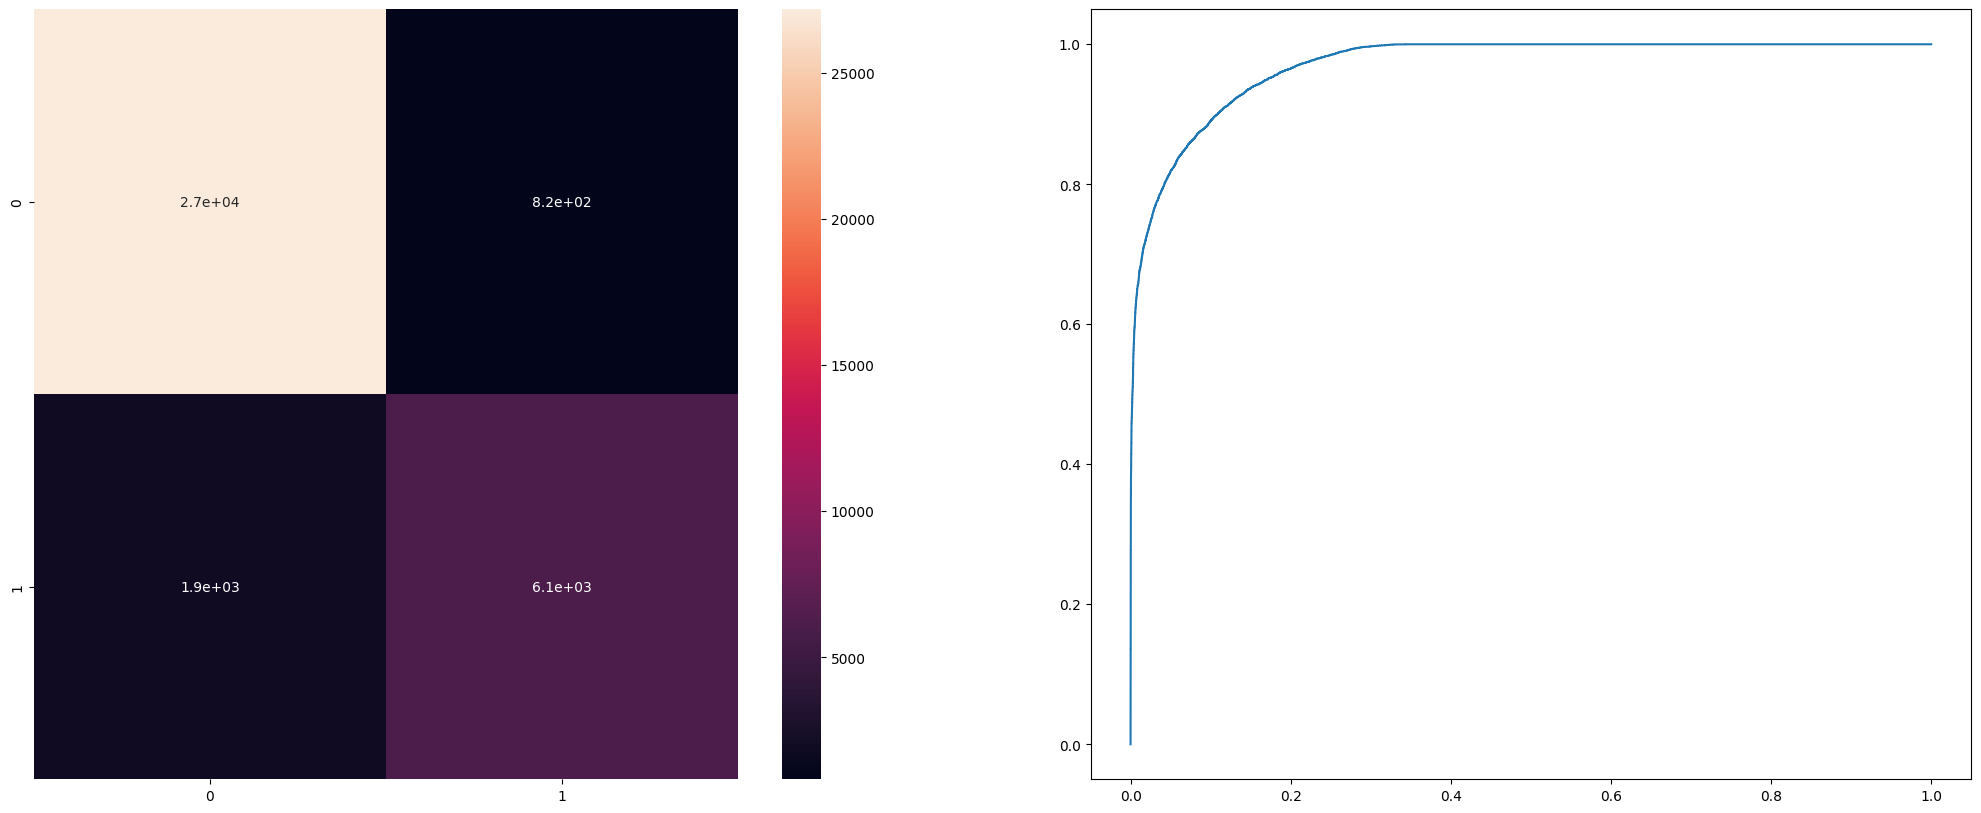

In [67]:
rfc_confusion = confusion_matrix(y_train, np.argmax(train_rfc, axis=1))

fig, ax = plt.subplots(1, 2, figsize=(25, 10))

plt.subplot(1, 2, 1)
sns.heatmap(rfc_confusion, annot=True)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")

plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_train, train_rfc[:,1])
plt.plot(fpr, tpr)

In [45]:
train_gbc = np.zeros((len(X_train), 2))
scores = []

stk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_idx, test_idx) in enumerate(stk.split(X_train, y_train)):
    X_train2, X_val = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
    y_train2, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    model = GradientBoostingClassifier(max_depth= 10, min_samples_leaf=10)
    model.fit(X_train2, y_train2)
    
    pred = model.predict(X_val)
    proba = model.predict_proba(X_val)
    
    acc = accuracy_score(y_val, pred)
    auc = roc_auc_score(y_val, proba[:, 1])
    print(str(i) + 'th acc score: ' + str(acc) +'| auc score: ' +str(auc))
    
    scores.append(auc)
    
    train_gbc[test_idx] += proba
    
print(f"Mean auc score: {np.mean(scores)}")

0th acc score: 0.9234722222222222| auc score: 0.973567347438493
1th acc score: 0.9333333333333333| auc score: 0.9756228666768841
2th acc score: 0.9341666666666667| auc score: 0.9773101998705093
3th acc score: 0.9290277777777778| auc score: 0.9753135501847856
4th acc score: 0.9320833333333334| auc score: 0.976520766988725
Mean auc score: 0.9756669462318793


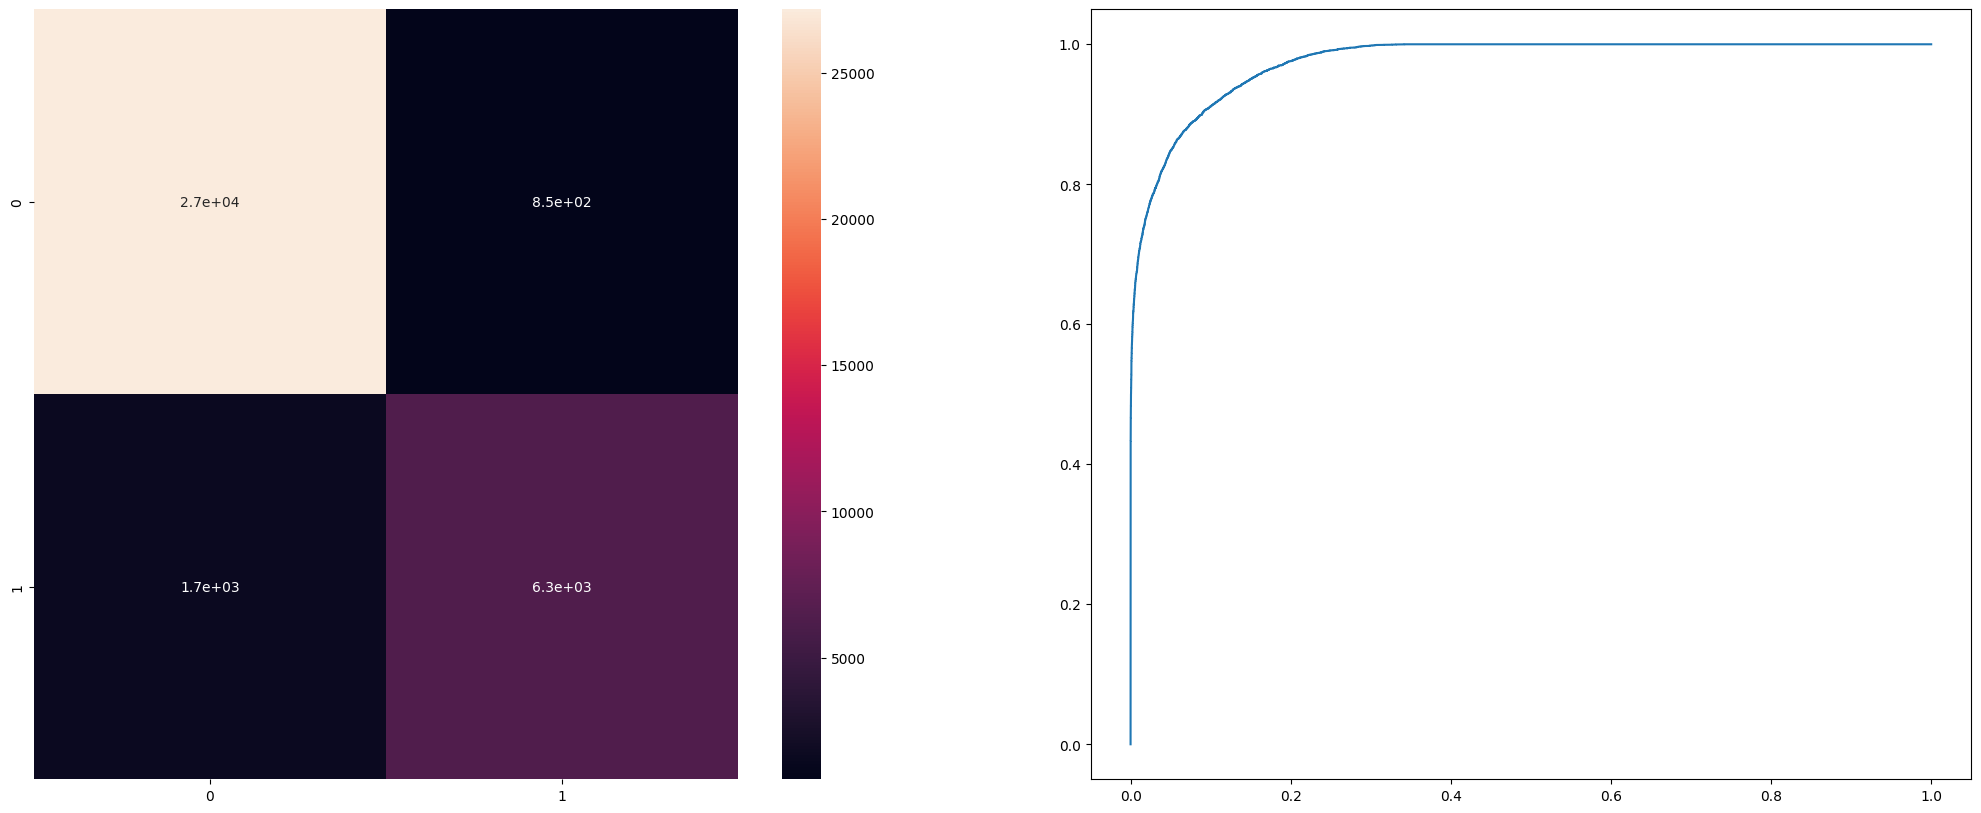

In [68]:
gbc_confusion = confusion_matrix(y_train, np.argmax(train_gbc, axis=1))

fig, ax = plt.subplots(1, 2, figsize=(25,10))

plt.subplot(1, 2, 1)
sns.heatmap(gbc_confusion, annot=True)
# plt.xlabel("predicted")
# plt.ylabel("actual")

plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_train, train_gbc[:, 1])
plt.plot(fpr, tpr)

In [48]:
train_abc = np.zeros((len(X_train), 2))
scores = []

stk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_idx, test_idx) in enumerate(stk.split(X_train, y_train)):
    X_train2, X_val = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
    y_train2, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    model = AdaBoostClassifier(learning_rate=1.0)
    model.fit(X_train2, y_train2)
    
    pred = model.predict(X_val)
    proba = model.predict_proba(X_val)
    
    acc = accuracy_score(y_val, pred)
    auc = roc_auc_score(y_val, proba[:, 1])
    print(str(i) + 'th acc score: ' + str(acc) + '| auc score: ' +str(auc))
    
    scores.append(auc)
    train_abc[test_idx] += proba
    
print(f"Mean auc score: {np.mean(scores)}")

0th acc score: 0.9056944444444445| auc score: 0.9604795958353869
1th acc score: 0.9141666666666667| auc score: 0.9653173996056299
2th acc score: 0.92| auc score: 0.9667447349172184
3th acc score: 0.9126388888888889| auc score: 0.9624763013745761
4th acc score: 0.9190277777777778| auc score: 0.9662073687253658
Mean auc score: 0.9642450800916353


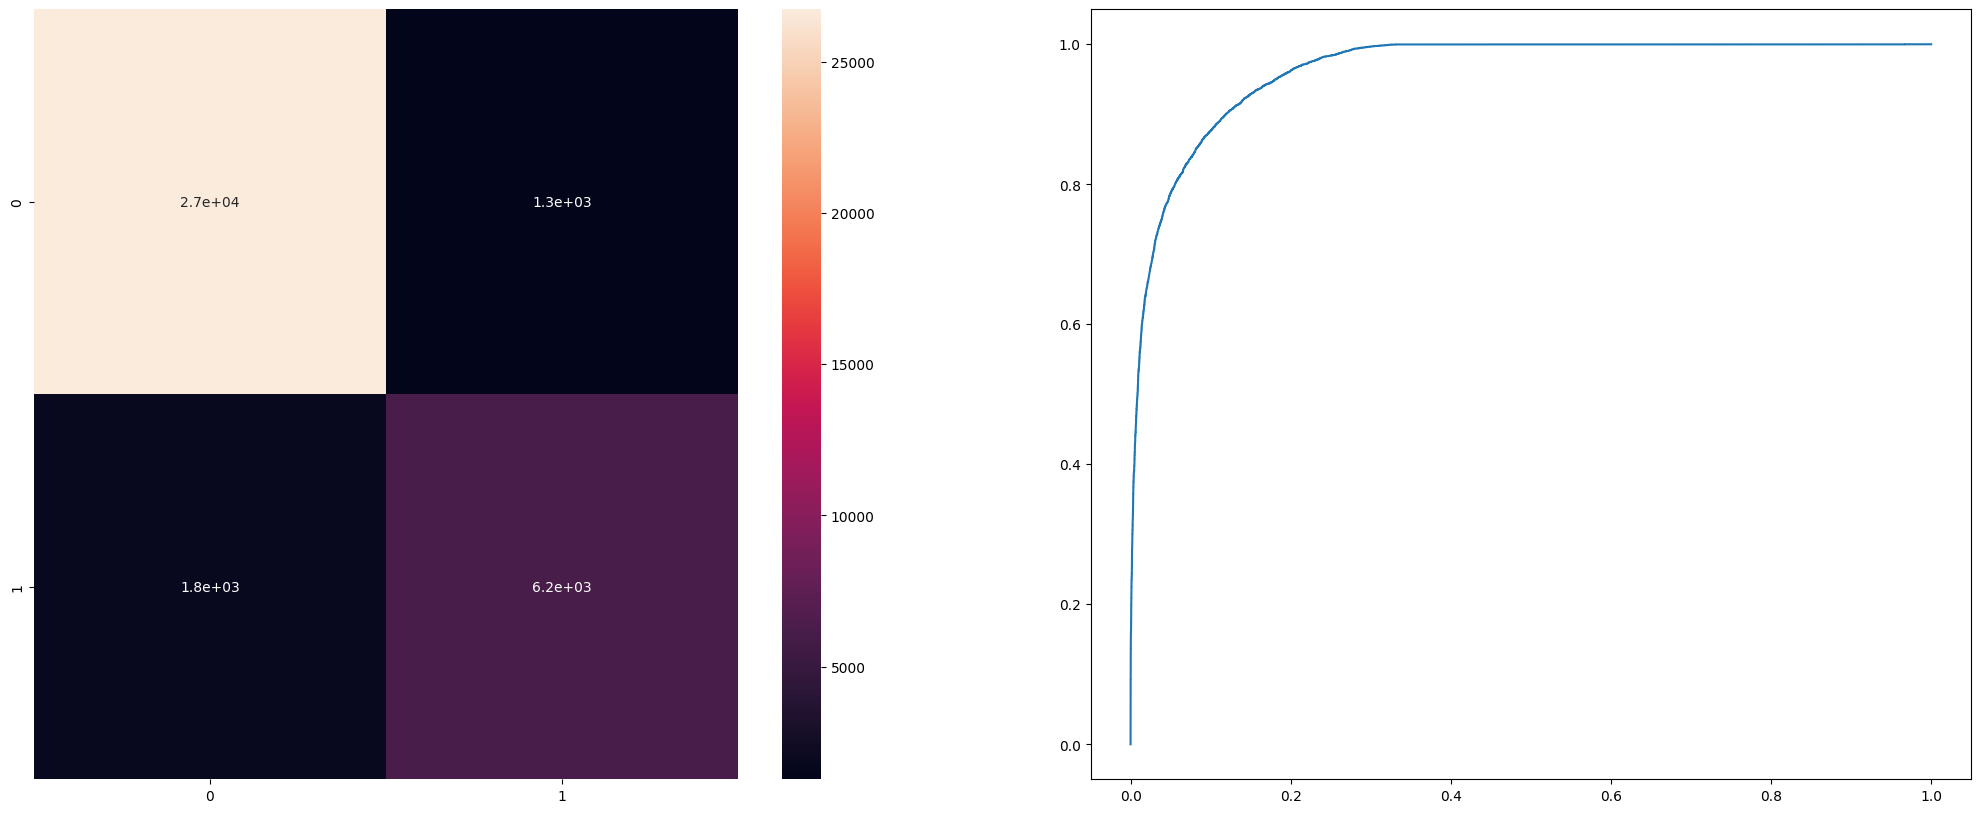

In [69]:
abc_confusion = confusion_matrix(y_train, np.argmax(train_abc, axis=1))

fig, ax = plt.subplots(1, 2, figsize=(25, 10))

plt.subplot(1,2, 1)
sns.heatmap(abc_confusion, annot=True)
# plt.xlabel("predicted")
# plt.ylabel('actual')

plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_train, train_abc[:, 1])
plt.plot(fpr, tpr)

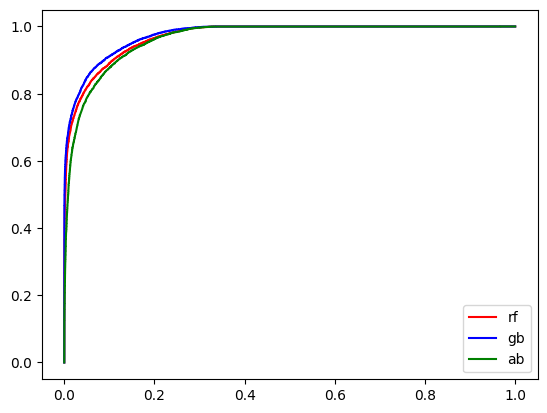

In [71]:
fpr, tpr, _ = roc_curve(y_train, train_rfc[:,1])
fpr2, tpr2, _ = roc_curve(y_train, train_gbc[:, 1])
fpr3, tpr3, _ = roc_curve(y_train, train_abc[:, 1])

plt.plot(fpr, tpr, color='r', label='rf')
plt.plot(fpr2, tpr2, color='b', label='gb')
plt.plot(fpr3, tpr3, color='g', label='ab')
plt.legend()

In [74]:
final_train = np.zeros((len(X_train), 2))
final_test = np.zeros((5, len(X_test), 2))
scores = []

stk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_idx, test_idx) in enumerate(stk.split(X_train, y_train)):
    X_train2, X_val = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
    y_train2, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    final_model = VotingClassifier(estimators=[('rfc', RandomForestClassifier() ), 
                                        ('gbc', GradientBoostingClassifier()),
                                        ('abc', AdaBoostClassifier())], voting='soft', weights=[2,3,1])
    final_model.fit(X_train2, y_train2)
    
    pred = final_model.predict(X_val)
    proba = final_model.predict_proba(X_val)
    
    final_train[test_idx] += proba
    
    acc = accuracy_score(y_val, pred)
    auc = roc_auc_score(y_val, proba[:, 1])
    scores.append(auc)
    
    test_pred = final_model.predict_proba(X_test)
    final_test[i] += test_pred
    
    print(str(i) +'th acc score: ' + str(acc) + '|auc score: ' + str(auc))
    
print(f"Voting Mean auc score: {np.mean(scores)}")
    

0th acc score: 0.9201388888888888|auc score: 0.969136827138886
1th acc score: 0.925|auc score: 0.9713916315422839
2th acc score: 0.9295833333333333|auc score: 0.9750895777880151
3th acc score: 0.9233333333333333|auc score: 0.9718661625854167
4th acc score: 0.9306944444444445|auc score: 0.9730819808230478
Voting Mean auc score: 0.9721132359755298


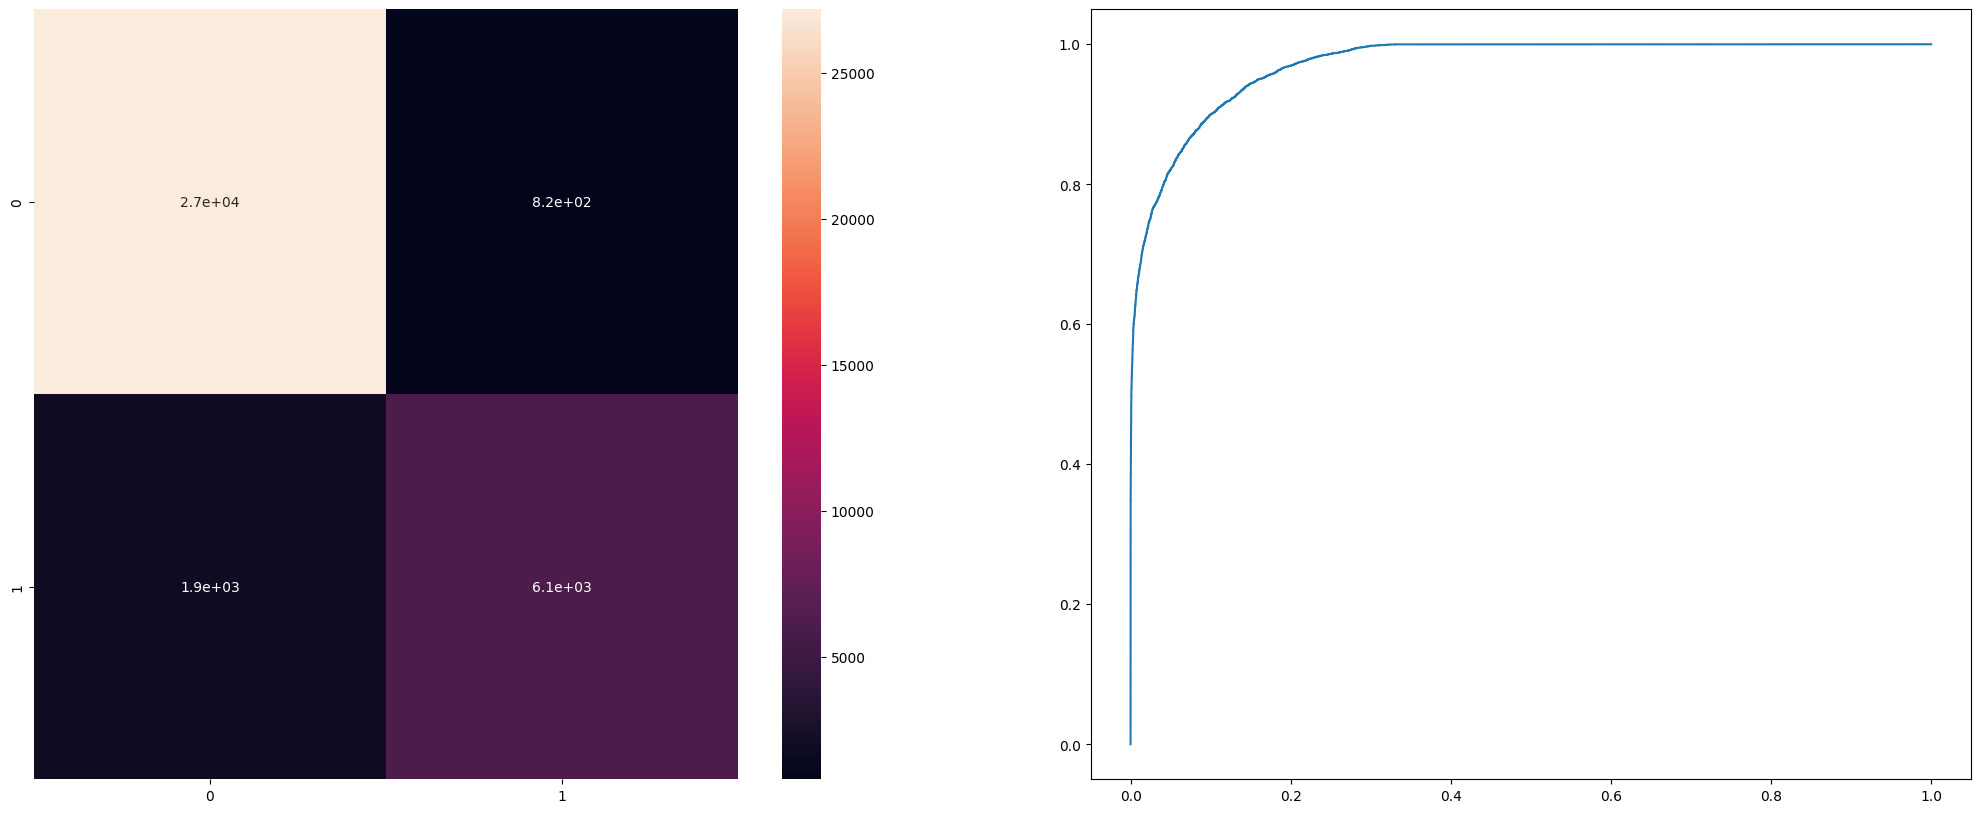

In [79]:
final_confusion = confusion_matrix(y_train, np.argmax(final_train, axis=1))

fig, ax = plt.subplots(1, 2, figsize=(25, 10))

plt.subplot(1, 2, 1)
sns.heatmap(final_confusion, annot=True)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')

plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_train, final_train[:, 1])
plt.plot(fpr, tpr)

In [83]:
final_test = np.mean(final_test, axis=0)
final_test.shape

(9000, 2)

In [85]:
submission = pd.DataFrame(final_test[:, 1], columns=['loan'])
submission

,loan
0,0.099643
1,0.057298
2,0.720392
3,0.054185
4,0.673762
...,...
8995,0.097670
8996,0.058262
8997,0.215483
8998,0.431132


In [87]:
submission.to_csv('submission.csv', index=False)